## Марковские случайные процессы, построение макровских моделей для временных рядов, прогнозирование знаечений

- Скачайте текст войны и мир. Очистите его, оставив только русские буквы и символы пробела. Постройте матрицу переходных вероятностей. Посчитайте вероятность встретить строку из 4-х символов, которая начинается п, а кончается на р; Используя матрицу переходных вероятностей сгенерируйте слово, начинающееся с буквы "Б" и имеющее длину 8-мь символов
- Возьмите ряд и оцените его через HMM. Попробуйте "построить" (через среднее каждой компоненты) наивный прогноз ряда.

In [4]:
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline

In [30]:
text=''
with open('tom_1.txt', 'r',encoding='utf-8') as f:
    text_temp=(f.read().lower())
text += re.sub('[^а-я ]','', text_temp)

with open('tom_2.txt', 'r',encoding='utf-8') as f:
    text_temp=(f.read().lower())  
text += re.sub('[^а-я ]','', text_temp)

with open('tom_3.txt', 'r',encoding='utf-8') as f:
    text_temp=(f.read().lower())  
text += re.sub('[^а-я ]','', text_temp)

with open('tom_4.txt', 'r',encoding='utf-8') as f:
    text_temp=(f.read().lower())  
text += re.sub('[^а-я ]','', text_temp)


In [41]:
RUSSIAN = 'абвгдежзийклмнопрстуфхцчшщъыьэюя '
POS_RU = {l: i for i, l in enumerate(RUSSIAN)}
probabilities_ru = np.zeros((len(RUSSIAN), len(RUSSIAN)))

In [48]:
for cp, cn in zip(text[:-1], text[1:]):
    probabilities_ru[POS_RU[cp], POS_RU[cn]] += 1
    
probabilities_ru = (probabilities_ru / probabilities_ru.sum(axis=1)[:, None])

df_ru = pd.DataFrame(probabilities_ru, index=(c for c in RUSSIAN), columns=(c for c in RUSSIAN))

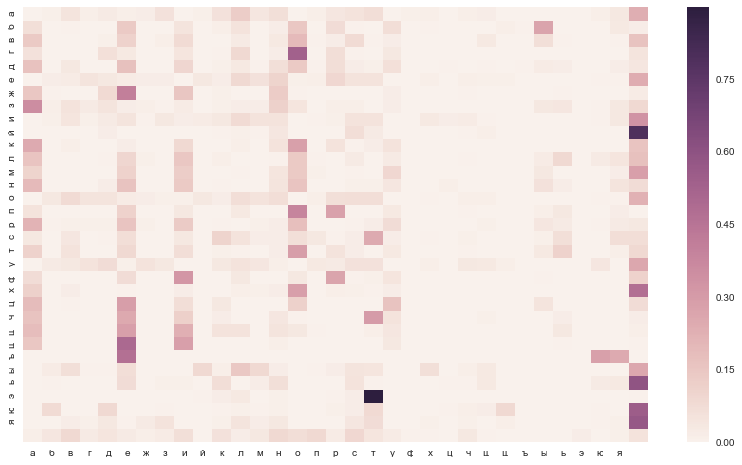

In [51]:
plt.figure(figsize=(14,8))
sns.heatmap(df_ru)
plt.show()

In [65]:
start = POS_RU['п']
end = POS_RU['р']
prior = 1. / len(RUSSIAN)
sum_prob=0
for c in RUSSIAN:
    for c1 in RUSSIAN:
        proba = prior * probabilities_ru[start, POS_RU[c]] *probabilities_ru[POS_RU[c], POS_RU[c1]]*probabilities_ru[POS_RU[c1],end]
        if proba > 0:
            #print(''.join(['п', c,c1, 'р']), proba)
            sum_prob+=proba
print(proba)           

6.5350550332e-08


In [95]:
word='б'
for i in range(0,7):
    index = POS_RU[word[i]]
    next_letter = np.random.choice(list(RUSSIAN),p=probabilities_ru[index])
    word+=next_letter
print(word)

божналут


- Возьмите ряд и оцените его через HMM. Попробуйте "построить" (через среднее каждой компоненты) наивный прогноз ряда.

In [11]:
from hmmlearn.hmm import GaussianHMM

In [84]:
numbers = pd.read_csv("numbers-on-unemployment-benefits.csv")

In [85]:
numbers.dropna(inplace=True)

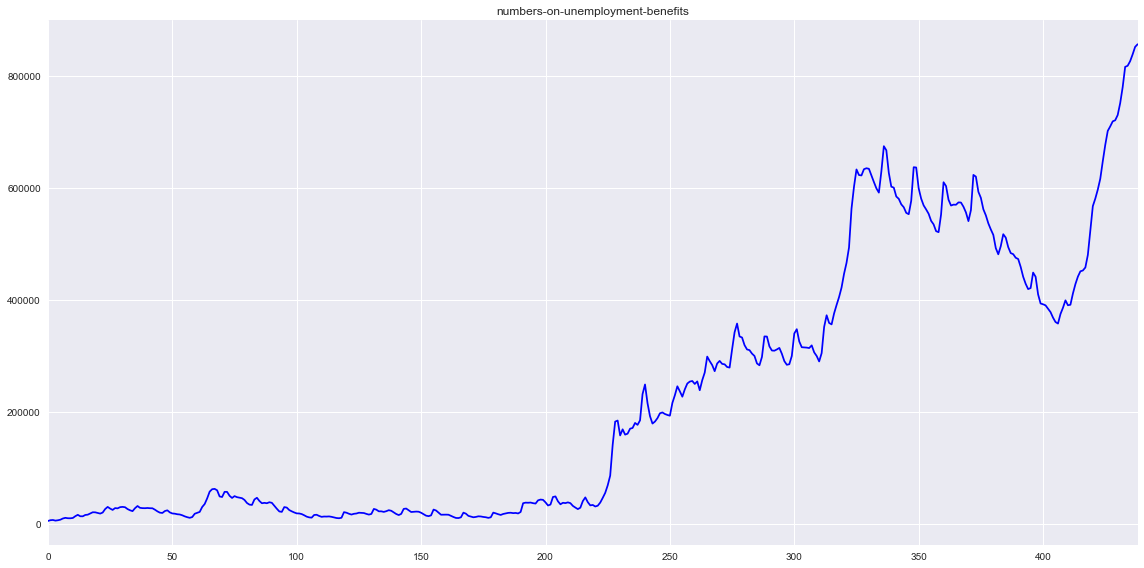

In [86]:
plt.figure(figsize=(16, 8))
layout = (3, 2)
ts_ax = plt.subplot()
numbers["Count"].plot(ax=ts_ax, color='blue')
ts_ax.set_title("numbers-on-unemployment-benefits")
plt.tight_layout()

In [87]:
values = numbers["Count"].values.reshape(-1,1)

In [88]:
score = {}
for n in range(1, 20):
    model = GaussianHMM(n_components=n,
                        covariance_type="diag",
                        n_iter=1000)
    model.fit(values)
    score[n] = model.score(values)

C:\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:70: DeprecationWarning: Function distribute_covar_matrix_to_match_covariance_type is deprecated; The functon distribute_covar_matrix_to_match_covariance_typeis deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
C:\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:70: DeprecationWarning: Function distribute_covar_matrix_to_match_covariance_type is deprecated; The functon distribute_covar_matrix_to_match_covariance_typeis deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
C:\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:70: DeprecationWarning: Function distribute_covar_matrix_to_match_covariance_type is deprecated; The functon distribute_covar_matrix_to_match_covariance_typeis deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
C:\Anaconda3\lib\site-packages\sklearn\utils\d

In [89]:
score

{1: -6052.0876938113888,
 2: -5328.1530285375784,
 3: -5192.6870192893857,
 4: -5130.6954121540903,
 5: -5070.0717195262941,
 6: -4940.7472787570323,
 7: -4916.6613446228002,
 8: -4876.0907199514368,
 9: -4850.6111358016542,
 10: -4831.9292505289677,
 11: -4775.3988941155321,
 12: -4761.8959177466695,
 13: -4756.3753977538518,
 14: -4748.6300872938673,
 15: -4726.1717080708386,
 16: -4710.9618013940171,
 17: -4672.977431368814,
 18: -4645.2601386675005,
 19: -4635.9697222826071}

C:\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:70: DeprecationWarning: Function distribute_covar_matrix_to_match_covariance_type is deprecated; The functon distribute_covar_matrix_to_match_covariance_typeis deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)


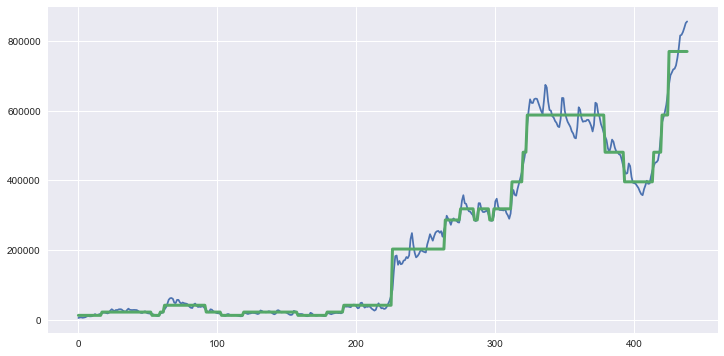

In [90]:
model = GaussianHMM(n_components=10,
                        covariance_type="diag",
                        n_iter=1000)
model.fit(values)
labels = model.predict(values)
means = np.zeros_like(values)
for i in range(model.n_components):
    means[labels == i] = model.means_[i]
    
plt.figure(figsize=(12, 6))
plt.plot(values)
plt.plot(means, linewidth=3)

In [100]:
 
cur_value = labels[-32]
predictions = []

for _ in range(32):
    cur_value = np.random.choice(10, p=model.transmat_[cur_value])    
    predictions.append(model.means_[cur_value])

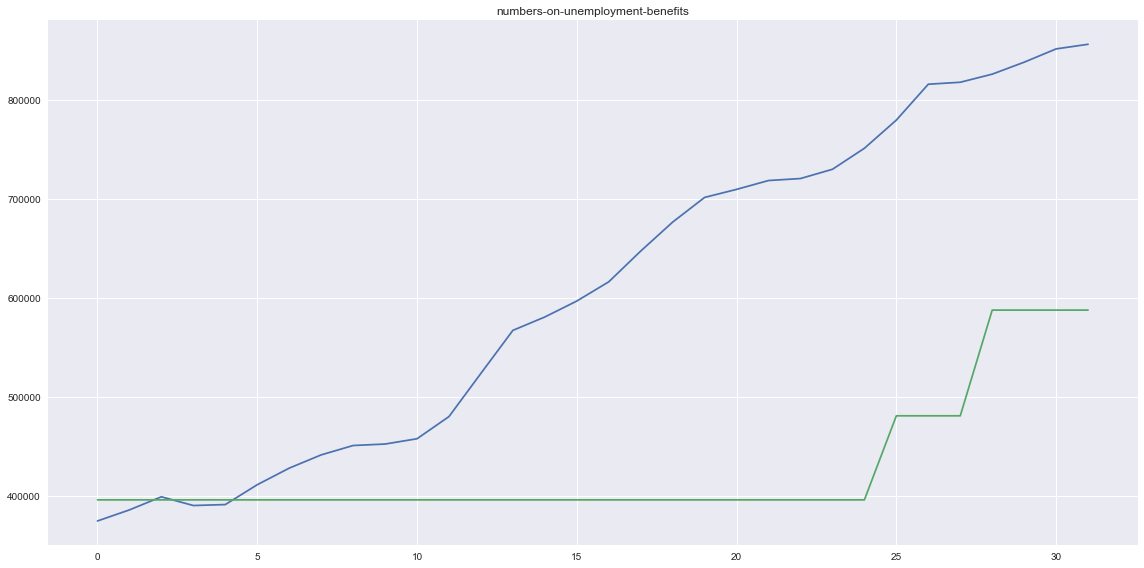

In [102]:
plt.figure(figsize=(16, 8))
layout = (3, 2)
ts_ax = plt.subplot()
plt.plot(values[-32:])
plt.plot(predictions)
ts_ax.set_title("numbers-on-unemployment-benefits")
plt.tight_layout()